# 과소적합 (underfitting)

우리가 공부했던 과적합을 실험적으로 구현해보겠습니다.  
이진분류에서 다뤘던 신경망과 IMDB 데이터셋으로요.  
![](https://drive.google.com/thumbnail?id=1qyTwfr1hPiFzpAflIPrlbjykCY9XGUT3&sz=s4000)

---
앞에서처럼 훈련 데이터를 직접 나눌수도 있지만 [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit)메서드에서 validation_split 설정으로 편리하게 나눠서 학습시킬수 있습니다.  
0과 1사의 값으로 검증데이터의 비율을 지정해줍니다.  
입력 뉴런의 개수는 데이터가 입력될때 결정됩니다.  
`input_shape`을 정의하지 않은 경우는 첫번째 데이터가 입력될때 그 데이터의 피처수로 입력 뉴런수가 결정이 됩니다.

In [69]:
from tensorflow import keras
from keras.datasets import imdb
from keras import models
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

original_model = keras.Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")])

original_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

original_hist = original_model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6818 - loss: 0.6088 - val_accuracy: 0.8654 - val_loss: 0.3986
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8888 - loss: 0.3415 - val_accuracy: 0.8655 - val_loss: 0.3412
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9226 - loss: 0.2419 - val_accuracy: 0.8882 - val_loss: 0.2843
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9414 - loss: 0.1879 - val_accuracy: 0.8874 - val_loss: 0.2785
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9539 - loss: 0.1532 - val_accuracy: 0.8795 - val_loss: 0.3020
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9625 - loss: 0.1302 - val_accuracy: 0.8825 - val_loss: 0.2999
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9676 - loss: 0.1116 - val_accuracy: 0.8876 - val_loss: 0.2996
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9741 - loss: 0.0973 - val_accuracy: 0.8797 - v

은닉층의 뉴런수를 16에서 4로 줄인 작은 신경망을 만들고 학습시켜 보겠습니다.  
![](https://drive.google.com/thumbnail?id=1ej6ZYCbe5_Lc8HNAVxcpEkkfV_9tUO8a&sz=s4000)

In [70]:
smaller_model = keras.Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")])

smaller_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

smaller_model_hist = smaller_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7005 - loss: 0.6186 - val_accuracy: 0.8048 - val_loss: 0.4885
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8790 - loss: 0.4213 - val_accuracy: 0.8720 - val_loss: 0.3772
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9038 - loss: 0.3262 - val_accuracy: 0.8846 - val_loss: 0.3236
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9196 - loss: 0.2634 - val_accuracy: 0.8862 - val_loss: 0.2977
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9353 - loss: 0.2195 - val_accuracy: 0.8800 - val_loss: 0.2992
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9418 - loss: 0.1900 - val_accuracy: 0.8781 - val_loss: 0.3004
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9472 - loss: 0.1715 - val_accuracy: 0.8883 - val_loss: 0.2766
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9557 - loss: 0.1505 - val_accuracy: 0.8886 - va

작은 모델의 파라미터 개수가 중간모델의 4분의 1밖에 안됩니다.  
훈련데이터의 정보를 저장할 수 있는 용량이 4분의 1밖에 안된다는 뜻이지요.

In [71]:
original_model.summary()
smaller_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 4)              │        40,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,060 (312.74 KB)

 Trainable params: 40,029 (156.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,031 (156.38 KB)

훈련데이터에 대해서는 중간 신경망의 손실함수값이 작은 신경망보다 빠르게 감소합니다.  
중간 신경망의 메모리가 더 커서 훈련 데이터의 정보를 빠르고 많이 습득하기 때문이겠죠.

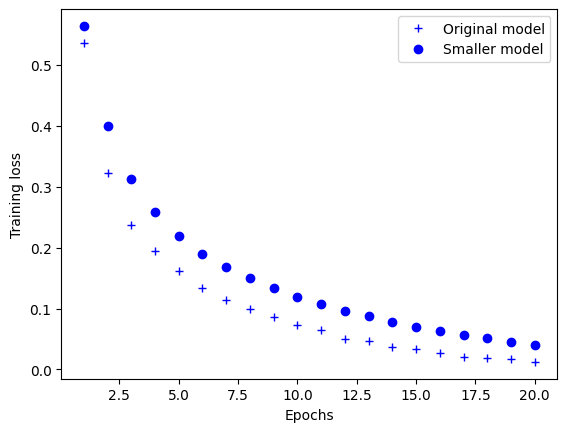

In [72]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
original_train_loss = original_hist.history['loss']
smaller_model_train_loss = smaller_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_train_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

검증데이터에 대해서는 작은 신경망에서 과적합이 더 늦게 그리고 더 완만히 진행됩니다.

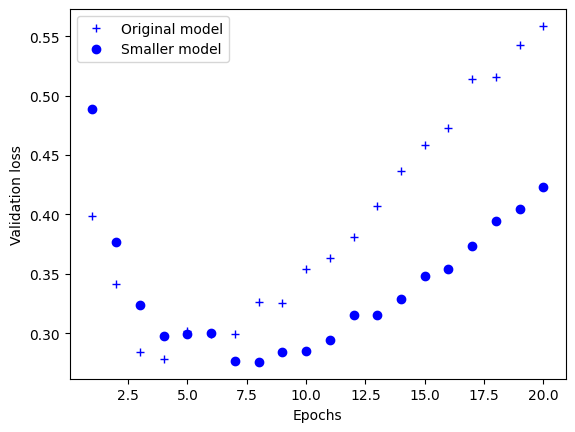

In [73]:
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 과대적합 (overfitting)

은닉층의 뉴런수를 16에서 512로 늘린 큰 신경망을 만들고 학습시켜 보겠습니다.  
![](https://drive.google.com/thumbnail?id=1q0daZATKf8vTpHRtPelk0bcu9_CcgbLz&sz=s4000)

In [74]:
bigger_model = keras.Sequential([
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(1, activation="sigmoid")])

bigger_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

bigger_model_hist = bigger_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.6481 - loss: 0.6468 - val_accuracy: 0.8671 - val_loss: 0.3517
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8721 - loss: 0.3272 - val_accuracy: 0.8741 - val_loss: 0.3049
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9072 - loss: 0.2382 - val_accuracy: 0.8849 - val_loss: 0.2805
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.9333 - loss: 0.1783 - val_accuracy: 0.8892 - val_loss: 0.2737
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9565 - loss: 0.1244 - val_accuracy: 0.8303 - val_loss: 0.4296
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9678 - loss: 0.1008 - val_accuracy: 0.8861 - val_loss: 0.3307
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9736 - loss: 0.0829 - val_accuracy: 0.8847 - val_loss: 0.3639
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9841 - loss: 0.0592 - val_accuracy: 0.8858 - v

큰 모델의 파라미터 개수가 중간모델의 무려 33배나 됩니다.  
기억 용량도 33배라는 뜻이지요.

In [75]:
original_model.summary()
bigger_model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,767,364 (41.07 MB)

 Trainable params: 5,383,681 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,383,683 (20.54 MB)

훈련데이터에 대해서는 큰 신경망의 손실함수값이 빠르게 0으로 떨어집니다.  
그런데 학습 중간에 튀는 불안정한 현상을 볼수 있네요.

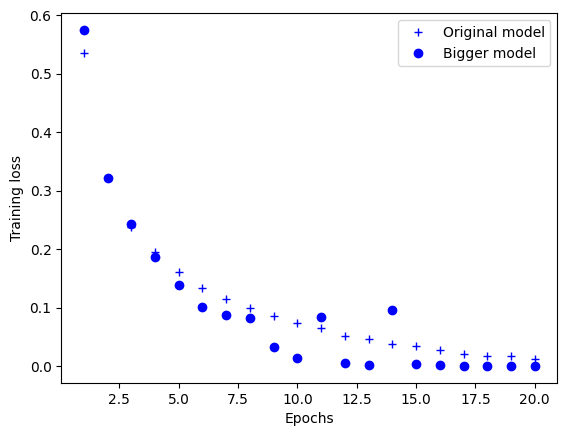

In [76]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

검증데이터에 대해서는 큰 신경망에서 과적합이 더 빨리 그리고 더 가파르게 그리고 더 불안정하게 진행됩니다.

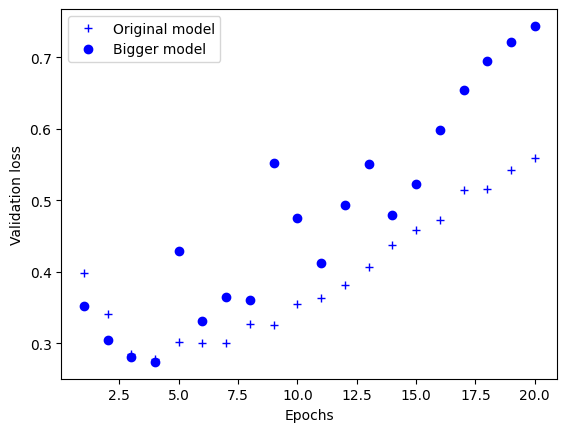

In [77]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# $L^2$-규제 ($L^2$-regularization)

우리는 $L^2$-규제에 대해 공부했습니다.  
기존 손실함수에 $L^2$ 페널티 ${1 \over 2} \times \lambda \times \sum w_{i,j}^2$를 더합니다.  
여기서 $w_{i,j}$는 모든 가중치를 뜻합니다.  
가중치 감소 계수 $\lambda$는 직접 설정해야 하는 하이퍼 파라미터입니다.  
크게 잡으면 페널티가 큰 역할을 하고 작게 잡으면 페널티 역할이 작아집니다.  
미분은 선형이기 때문에 새로운 손실함수의 그레디언트는 기존 손실함수의 그레디언트와 페널티의 그레디언트를 합한 것과 같습니다.  
경사하강법을 적용하면 각 그레디언트의 반대방향의 합으로 가중치를 업데이트합니다.  
각각은 정반대 역할을 합니다.  
기존 손실함수의 그레디언트의 반대방향으로 업데이트하면 신경망은 훈련데이터의 정보를 더 담아냅니다.  
$L^2$-페널티의 그레디언트의 반대방향 업데이트는 신경망의 가중치를 비슷하게 만드려는 경향이 있습니다.  
이는 습득한 정보를 뭉게버리는 효과가 있습니다.  
케라스에서는 [tf.keras.regularizers.L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2)를 통해 구현되어 있습니다.  
[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 클래스에서 인수로 설정할 수 있습니다.

In [78]:
from tensorflow.keras import regularizers

l2_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(1, activation="sigmoid")])

l2_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

l2_model_hist = l2_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6862 - loss: 0.6853 - val_accuracy: 0.8410 - val_loss: 0.4861
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8853 - loss: 0.4211 - val_accuracy: 0.8846 - val_loss: 0.3839
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9120 - loss: 0.3325 - val_accuracy: 0.8820 - val_loss: 0.3728
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9296 - loss: 0.2890 - val_accuracy: 0.8879 - val_loss: 0.3588
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9362 - loss: 0.2708 - val_accuracy: 0.8833 - val_loss: 0.3649
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9451 - loss: 0.2509 - val_accuracy: 0.8842 - val_loss: 0.3683
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9488 - loss: 0.2411 - val_accuracy: 0.8727 - val_loss: 0.3981
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9514 - loss: 0.2349 - val_accuracy: 0.8839 - v

$L^2$-규제된 신경망은 학습데이터의 손실함수값이 일정 수준 이하로는 내려오질 않네요.

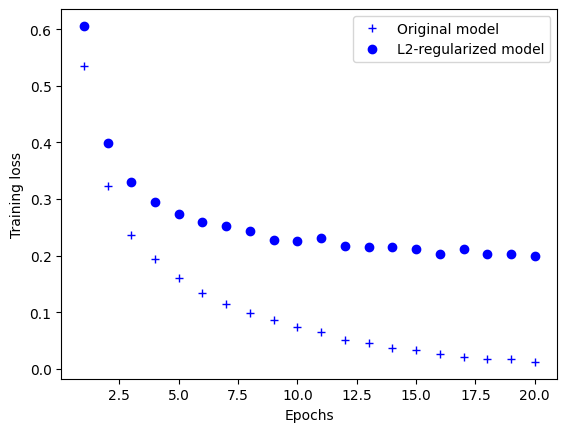

In [79]:
l2_model_loss = l2_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

$L^2$-규제된 신경망은 과적합이 억제되고 있습니다.

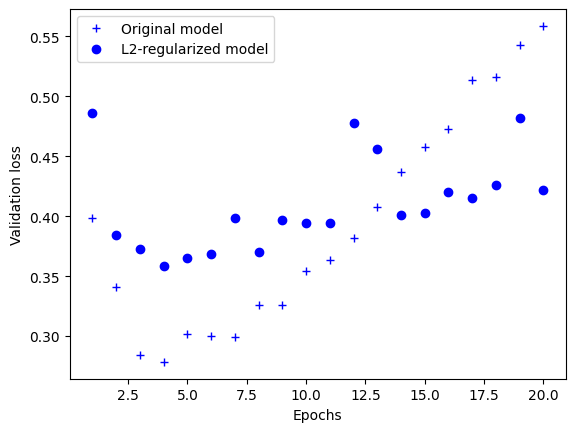

In [80]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

**[실습1] (10분) 가중치 감소 계수 $\lambda$를 약하게 $0.0002$로 잡은 모델과 강하게 $0.02$로 잡은 모델을 학습시키고 검증데이터의 손실함수 히스토리를 그래프로 그리시오.**

In [81]:
# weak =  0.0002

from tensorflow.keras import regularizers

w_l2_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.0002), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.0002), activation="relu"),
    Dense(1, activation="sigmoid")])

w_l2_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

w_l2_model_hist = w_l2_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6554 - loss: 0.6334 - val_accuracy: 0.8670 - val_loss: 0.4228
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8927 - loss: 0.3703 - val_accuracy: 0.8856 - val_loss: 0.3339
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9120 - loss: 0.2769 - val_accuracy: 0.8915 - val_loss: 0.2973
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9385 - loss: 0.2156 - val_accuracy: 0.8940 - val_loss: 0.2888
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9485 - loss: 0.1853 - val_accuracy: 0.8755 - val_loss: 0.3253
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9557 - loss: 0.1622 - val_accuracy: 0.8843 - val_loss: 0.3100
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9620 - loss: 0.1445 - val_accuracy: 0.8853 - val_loss: 0.3138
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9630 - loss: 0.1370 - val_accuracy: 0.8780 - v

In [82]:
# strong = 0.02

from tensorflow.keras import regularizers

s_l2_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.02), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.02), activation="relu"),
    Dense(1, activation="sigmoid")])

s_l2_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

s_l2_model_hist = s_l2_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6710 - loss: 1.2241 - val_accuracy: 0.8083 - val_loss: 0.8105
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8578 - loss: 0.7673 - val_accuracy: 0.8533 - val_loss: 0.7225
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8703 - loss: 0.6888 - val_accuracy: 0.8675 - val_loss: 0.6577
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8807 - loss: 0.6333 - val_accuracy: 0.8688 - val_loss: 0.6156
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8862 - loss: 0.5893 - val_accuracy: 0.8454 - val_loss: 0.6136
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8838 - loss: 0.5622 - val_accuracy: 0.8650 - val_loss: 0.5693
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8887 - loss: 0.5336 - val_accuracy: 0.8552 - val_loss: 0.5604
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8834 - loss: 0.5198 - val_accuracy: 0.8720 - v

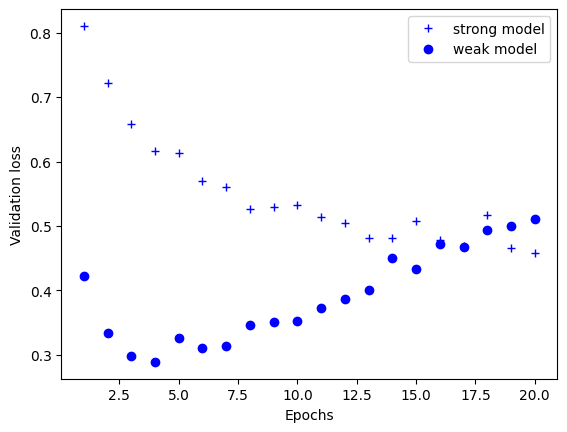

In [83]:
w_l2_model_val_loss = w_l2_model_hist.history['val_loss']
s_l2_model_val_loss = s_l2_model_hist.history['val_loss']

plt.plot(epochs, s_l2_model_val_loss, 'b+', label='strong model')
plt.plot(epochs, w_l2_model_val_loss, 'bo', label='weak model')

plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# $L^1$-규제 ($L^1$-regularization)

우리는 $L^1$-규제에 대해 공부했습니다.  
기존 손실함수에 $L^1$ 페널티 ${1 \over 2} \times \lambda \times \sum |w_{i,j}|$를 더합니다.  
여기서 $w_{i,j}$는 모든 가중치를 뜻합니다.  
가중치 감소 계수 $\lambda$는 직접 설정해야 하는 하이퍼 파라미터입니다.  
크게 잡으면 페널티가 큰 역할을 하고 작게 잡으면 페널티 역할이 작아집니다.  
미분은 선형이기 때문에 새로운 손실함수의 그레디언트는 기존 손실함수의 그레디언트와 페널티의 그레디언트를 합한 것과 같습니다.  
경사하강법을 적용하면 각 그레디언트의 반대방향의 합으로 가중치를 업데이트합니다.  
각각은 정반대 역할을 합니다.  
기존 손실함수의 그레디언트의 반대방향으로 업데이트하면 신경망은 훈련데이터의 정보를 더 담아냅니다.  
$L^1$-페널티의 그레디언트의 반대방향 업데이트는 절대값이 작은 가중치를 아예 없애버리려는 경향이 있습니다.  
이는 습득한 정보를 뭉게버리는 효과가 있습니다.  
케라스에서는 [tf.keras.regularizers.L1](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1)를 통해 구현되어 있습니다.  
[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 클래스에서 인수로 설정할 수 있습니다.

In [84]:
l1_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    Dense(1, activation="sigmoid")])

l1_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

l1_model_hist = l1_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6738 - loss: 1.6158 - val_accuracy: 0.8067 - val_loss: 0.7218
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8221 - loss: 0.6900 - val_accuracy: 0.8567 - val_loss: 0.6384
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8577 - loss: 0.6185 - val_accuracy: 0.8617 - val_loss: 0.5968
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8597 - loss: 0.5859 - val_accuracy: 0.8266 - val_loss: 0.6211
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8614 - loss: 0.5644 - val_accuracy: 0.8408 - val_loss: 0.5979
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8660 - loss: 0.5529 - val_accuracy: 0.8613 - val_loss: 0.5615
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8715 - loss: 0.5329 - val_accuracy: 0.8669 - val_loss: 0.5466
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8769 - loss: 0.5264 - val_accuracy: 0.8706 - v

**[실습2] (5분) 기본 신경망과 $L^1$-규제된 신경망의 훈련데이터에 대한 손실함수값 히스토리를 그래프로 그리시오.**

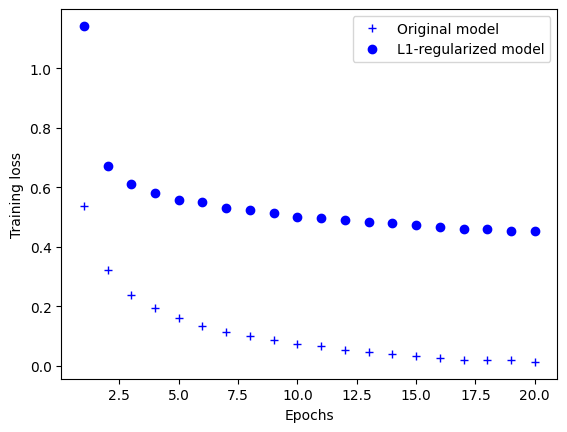

In [85]:
l1_model_loss = l1_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

**[실습3] (5분) 기본 신경망과 $L^1$-규제된 신경망의 검증데이터에 대한 손실함수값 히스토리를 그래프로 그리시오.**

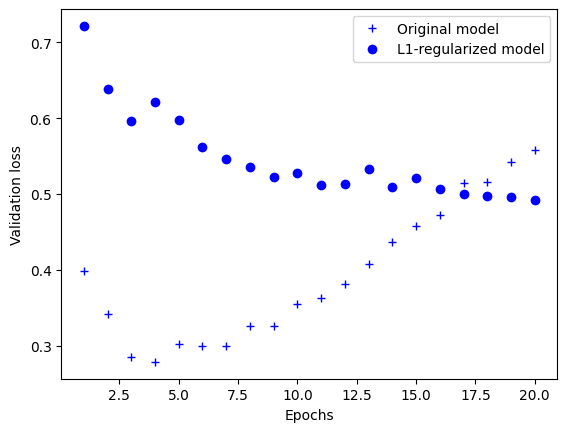

In [86]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# Dropout

이전에 공부한 dropout을 케라스로 구현하겠습니다.  
dropout은 학습 데이터가 들어올때마다 무작위로 뉴런을 삭제해서 신호전달을 차단하는 기법입니다.  
이상해보이지만 과적합 억제를 위해 매우 많이 사용되는 기법입니다.  
케라스에는 [Dropout층](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)이 구현되어 있습니다.  
몇 퍼센트를 삭제할지 인수로 지정해 줍니다.  
![](https://drive.google.com/thumbnail?id=1wPtyMrgWXGxiJp0YofJPGlYDDE94uoX-&sz=s4000)

c:\Users\USER\.conda\envs\snake\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5221 - loss: 0.6865 - val_accuracy: 0.8133 - val_loss: 0.5950
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6836 - loss: 0.5882 - val_accuracy: 0.8623 - val_loss: 0.4473
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7793 - loss: 0.4760 - val_accuracy: 0.8793 - val_loss: 0.3641
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8310 - loss: 0.3998 - val_accuracy: 0.8788 - val_loss: 0.3267
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8659 - loss: 0.3481 - val_accuracy: 0.8849 - val_loss: 0.2894
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8828 - loss: 0.3037 - val_accuracy: 0.8827 - val_loss: 0.2816
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9042 - loss: 0.2695 - val_accuracy: 0.8901 - val_loss: 0.2724
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9210 - loss: 0.2389 - val_accuracy: 0.8896 - v

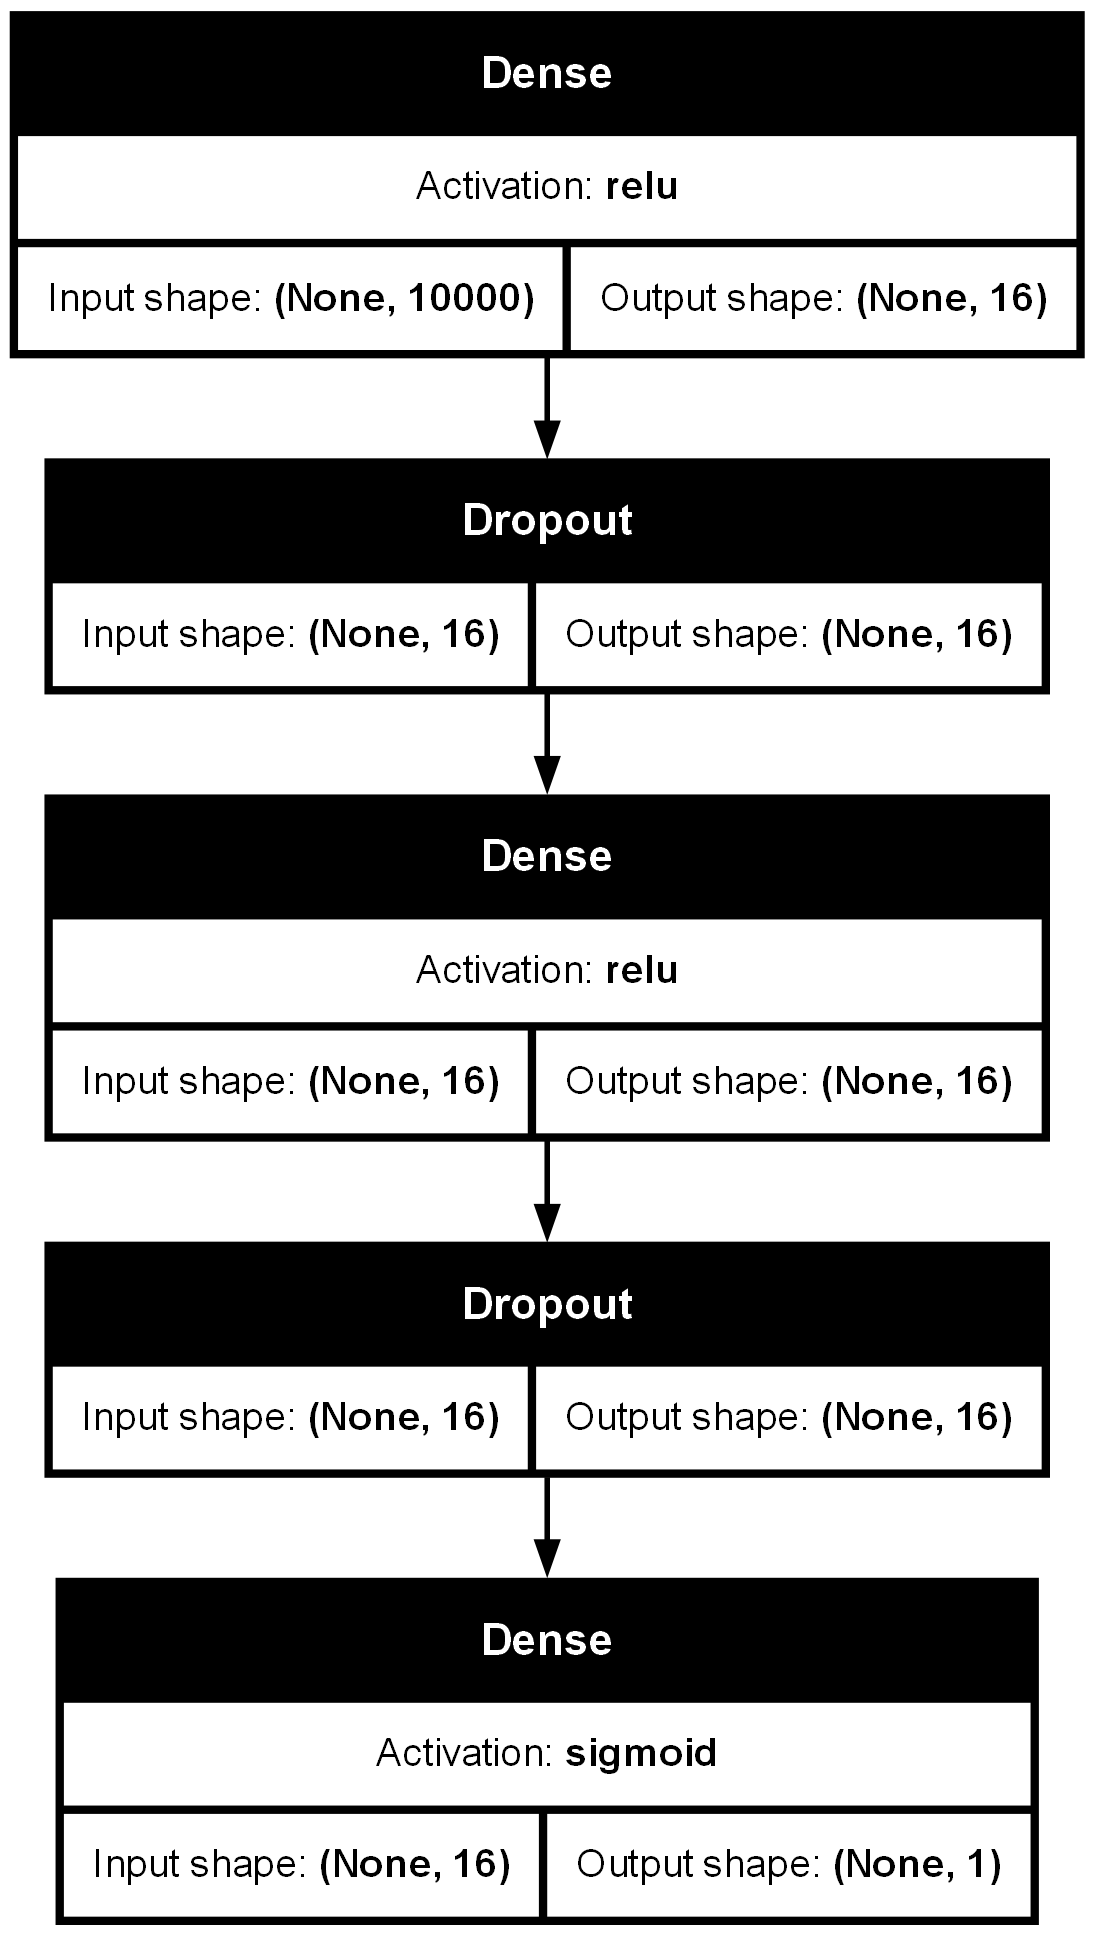

In [87]:
from tensorflow.keras.utils import plot_model
from keras.layers import Dropout

dropout_model = keras.Sequential([
    Dense(16, input_shape=(10000,), activation="relu"),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")])

dropout_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

dropout_model_hist = dropout_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

plot_model(dropout_model, show_shapes=True, show_layer_activations=True)

dropout층이 추가된 신경망은 학습데이터의 손실함수값이 천천히 떨어지네요.

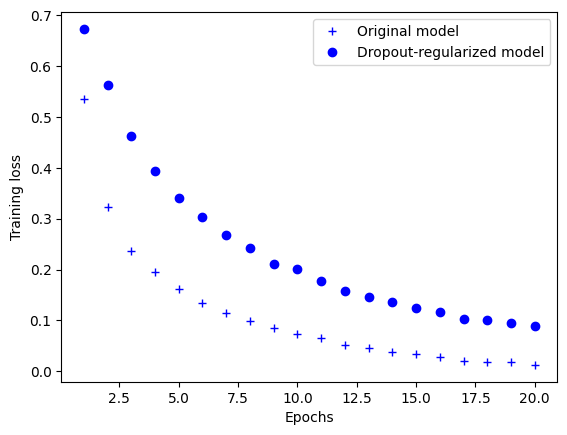

In [88]:
dropout_model_loss = dropout_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

dropout층이 추가된 신경망은 과적합이 늦게 시작되고 더 완만하게 진행됩니다.

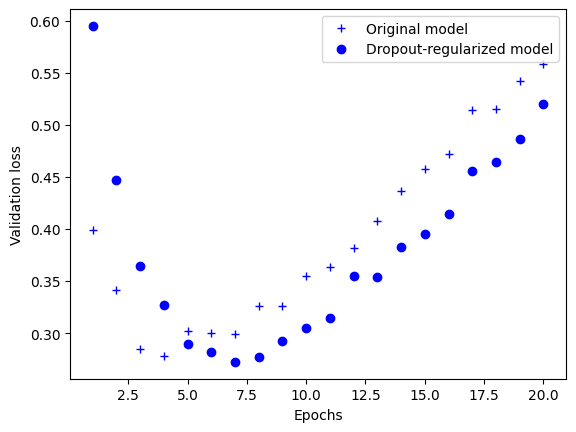

In [89]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

**[실습4] (10분) dropout 비율을 약하게 $0.2$로 잡은 모델과 강하게 $0.8$로 잡은 모델을 학습시키고 검증데이터의 손실함수 히스토리를 그래프로 그리시오.**

In [90]:
from tensorflow.keras.utils import plot_model
from keras.layers import Dropout

w_dropout_model = keras.Sequential([
    Dense(16, input_shape=(10000,), activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")])

w_dropout_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

w_dropout_model_hist = w_dropout_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6667 - loss: 0.6215 - val_accuracy: 0.8484 - val_loss: 0.4306
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8454 - loss: 0.4148 - val_accuracy: 0.8828 - val_loss: 0.3289
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8910 - loss: 0.3135 - val_accuracy: 0.8889 - val_loss: 0.2920
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9175 - loss: 0.2513 - val_accuracy: 0.8913 - val_loss: 0.2781
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9291 - loss: 0.2084 - val_accuracy: 0.8876 - val_loss: 0.2807
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9430 - loss: 0.1707 - val_accuracy: 0.8890 - val_loss: 0.2793
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9571 - loss: 0.1445 - val_accuracy: 0.8848 - val_loss: 0.2894
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9636 - loss: 0.1229 - val_accuracy: 0.8852 - v

In [91]:
from tensorflow.keras.utils import plot_model
from keras.layers import Dropout

s_dropout_model = keras.Sequential([
    Dense(16, input_shape=(10000,), activation="relu"),
    Dropout(0.8),
    Dense(16, activation="relu"),
    Dropout(0.8),
    Dense(1, activation="sigmoid")])

s_dropout_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

s_dropout_model_hist = s_dropout_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5102 - loss: 0.7044 - val_accuracy: 0.6764 - val_loss: 0.6846
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5632 - loss: 0.6814 - val_accuracy: 0.7042 - val_loss: 0.6404
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5968 - loss: 0.6628 - val_accuracy: 0.7946 - val_loss: 0.6195
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6214 - loss: 0.6448 - val_accuracy: 0.8338 - val_loss: 0.5892
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6509 - loss: 0.6227 - val_accuracy: 0.8551 - val_loss: 0.5611
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6591 - loss: 0.6094 - val_accuracy: 0.8627 - val_loss: 0.5198
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6688 - loss: 0.5952 - val_accuracy: 0.8670 - val_loss: 0.5028
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6911 - loss: 0.5727 - val_accuracy: 0.8680 - v

C:\Users\USER\AppData\Local\Temp\ipykernel_22816\4142832237.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, original_val_loss, 'b+', label='Original model', color= 'red')
C:\Users\USER\AppData\Local\Temp\ipykernel_22816\4142832237.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b^" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, w_dropout_model_val_loss, 'b^', label='weak', color= 'green')


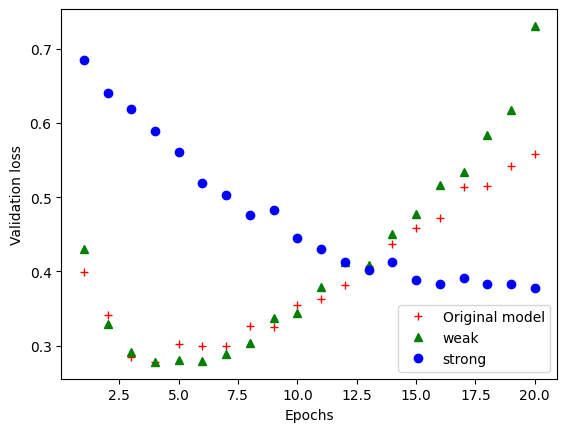

In [92]:
w_dropout_model_val_loss = w_dropout_model_hist.history['val_loss']
s_dropout_model_val_loss = s_dropout_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model', color= 'red')
plt.plot(epochs, w_dropout_model_val_loss, 'b^', label='weak', color= 'green')
plt.plot(epochs, s_dropout_model_val_loss, 'bo', label='strong')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [93]:
from keras.layers import BatchNormalization

bn_true_model= keras.Sequential([
    Dense(16, activation= 'relu'), 
    BatchNormalization(), 
    Dense(16, activation= 'relu'), 
    BatchNormalization(), 
    Dense(1, activation= 'sigmoid')
])

bn_true_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

bn_true_model_hist = bn_true_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4, verbose= 1)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6979 - loss: 0.5784 - val_accuracy: 0.8065 - val_loss: 0.5799
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9335 - loss: 0.2187 - val_accuracy: 0.8527 - val_loss: 0.5085
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9680 - loss: 0.1274 - val_accuracy: 0.8726 - val_loss: 0.4444
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9878 - loss: 0.0749 - val_accuracy: 0.8730 - val_loss: 0.3892
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9955 - loss: 0.0425 - val_accuracy: 0.8651 - val_loss: 0.3725
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9978 - loss: 0.0251 - val_accuracy: 0.8413 - val_loss: 0.3713
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9991 - loss: 0.0160 - val_accuracy: 0.8571 - val_loss: 0.3420
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.8590 - v

: 

C:\Users\USER\AppData\Local\Temp\ipykernel_22816\694606208.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b+" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, original_val_loss, 'b+', label='Original model', color= 'red')
C:\Users\USER\AppData\Local\Temp\ipykernel_22816\694606208.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b^" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, w_dropout_model_val_loss, 'b^', label='weak', color= 'green')
C:\Users\USER\AppData\Local\Temp\ipykernel_22816\694606208.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, bn, 'bx', label='bn', color= 'orange')


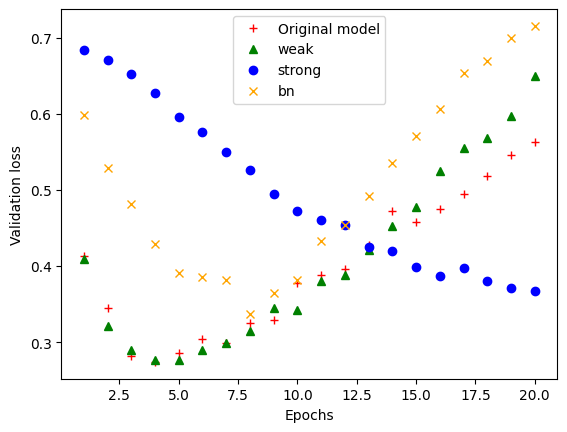

In [67]:
w_dropout_model_val_loss = w_dropout_model_hist.history['val_loss']
s_dropout_model_val_loss = s_dropout_model_hist.history['val_loss']
bn = bn_true_model_hist.history['val_loss']
plt.plot(epochs, original_val_loss, 'b+', label='Original model', color= 'red')
plt.plot(epochs, w_dropout_model_val_loss, 'b^', label='weak', color= 'green')
plt.plot(epochs, s_dropout_model_val_loss, 'bo', label='strong')
plt.plot(epochs, bn, 'bx', label='bn', color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [68]:
from keras import initializers

model= Sequential([
    Dense(16, input_shape=(10000,), activation="relu"),
    Dropout(0.8),
    Dense(16, activation="relu"),
    Dropout(0.8),
    Dense(1, activation="sigmoid")
])

In [ ]:



weight_decay= 0.001

In [ ]:
step_decay, 그냥 decay, 